## Analysis of 3 lane highway (A10) with a maximum speed of 100 km/h

Analysis of traffic data from 2017 (tuesdays). The Data folder contains the raw data as provided by: https://www.ndw.nu/pagina/nl/4/databank/31/actuele_verkeersgegevens/. The Output folder contains the processed data used to construct the graphs.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

In [2]:
from os import listdir
from os.path import isfile, join


In [4]:
#list of excel file-names in Data folder
path = 'Data'
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
onlyfiles = [path + '/' + x for x in onlyfiles]
print(onlyfiles)

FileNotFoundError: [Errno 2] No such file or directory: 'Data'

In [5]:
#Importing the data from data-collection points 1 and 2 as dataframes
speed1 = []
speed2 = []
intensity1 = []
intensity2 = []
for x in onlyfiles:
    if x[-9:] == 'speed.xls':
        df = pd.read_excel(x, sheet_name=1,header = 3,usecols = range(0,6),nrows = 24)
        speed1.append(df)
        df = pd.read_excel(x, sheet_name=1,header = 30,usecols = range(0,6),nrows = 24)
        speed2.append(df)    
    if x[-13:] == 'intensity.xls':
        df = pd.read_excel(x, sheet_name=2,header = 3,usecols = range(0,6),nrows = 24)
        intensity1.append(df)
        df = pd.read_excel(x, sheet_name=2,header = 30,usecols = range(0,6),nrows = 24)
        intensity2.append(df)



NameError: name 'onlyfiles' is not defined

In [6]:
#Creating dataframes with averages and errors
def averager(frame_list,start_range ,end_range,confidence_interval = 1.96):
    first = True
    for k in frame_list:
        cache = []
        for i in range(start_range, end_range):
            cache.append(k.iloc[:,i].tolist())
        if first:
            average = np.asarray(cache)
            first = False
        else:
            average = average + cache
    average_list = (average/len(frame_list)).tolist()
    error_list = []
    for i in range(start_range, end_range):
        cache = []
        for k in frame_list:
            cache.append(k.iloc[:,i].tolist())
        cache = np.asarray(cache)
        cache = cache.T.tolist()
        cache = [confidence_interval*np.std(x)/np.sqrt(len(x)) for x in cache]
        error_list.append(cache)
    average_frame = copy.deepcopy(frame_list[0])
    error_frame = copy.deepcopy(frame_list[0])
    counter = 0
    for i in range(start_range,end_range):
        n_1 = average_frame.columns[i]
        n_2 = error_frame.columns[i]
        average_frame[n_1] = average_list[counter]
        error_frame[n_2] = error_list[counter]
        counter = counter + 1
    return average_frame, error_frame

def merge_dataframes(intensity,speed):
    df1 = copy.deepcopy(intensity)
    df2 = copy.deepcopy(speed)
    n = df2.columns[0]
    df2.drop(n, axis = 1, inplace = True)
    n = df2.columns[4]
    df2.drop(n, axis = 1, inplace = True)
    result = pd.concat([df1, df2], axis=1, sort=False)
    return result

In [26]:
#Dataframes with averages and error of speed and intensity from 2 data collection points
speed_average_1, speed_error_1 = averager(speed1,1,5)
speed_average_2, speed_error_2 = averager(speed2,1,5)
intensity_average_1,intensity_error_1 = averager(intensity1,1,6)
intensity_average_2,intensity_error_2 = averager(intensity2,1,6)

In [27]:
#Continueing with only collection point 1 and output to .csv file in output folder
average = merge_dataframes(intensity_average_1, speed_average_1)
error = merge_dataframes(intensity_error_1,speed_error_1)
average.to_csv('Output/Average.csv')
error.to_csv('Output/error.csv')
print(average)

    Uur op de dag  Intensiteit per uur  Motor/personenauto (%)  \
0   00:00 - 00:59               315.75               87.071795   
1   01:00 - 01:59               176.00               78.174811   
2   02:00 - 02:59               122.25               74.058900   
3   03:00 - 03:59               125.25               67.682180   
4   04:00 - 04:59               200.50               62.615237   
5   05:00 - 05:59              1062.25               79.643922   
6   06:00 - 06:59              4416.75               85.974310   
7   07:00 - 07:59              6131.75               88.879061   
8   08:00 - 08:59              5830.50               89.354246   
9   09:00 - 09:59              4385.75               85.738676   
10  10:00 - 10:59              3049.75               81.644403   
11  11:00 - 11:59              2884.75               81.505572   
12  12:00 - 12:59              3184.75               82.841281   
13  13:00 - 13:59              3224.00               83.306597   
14  14:00 

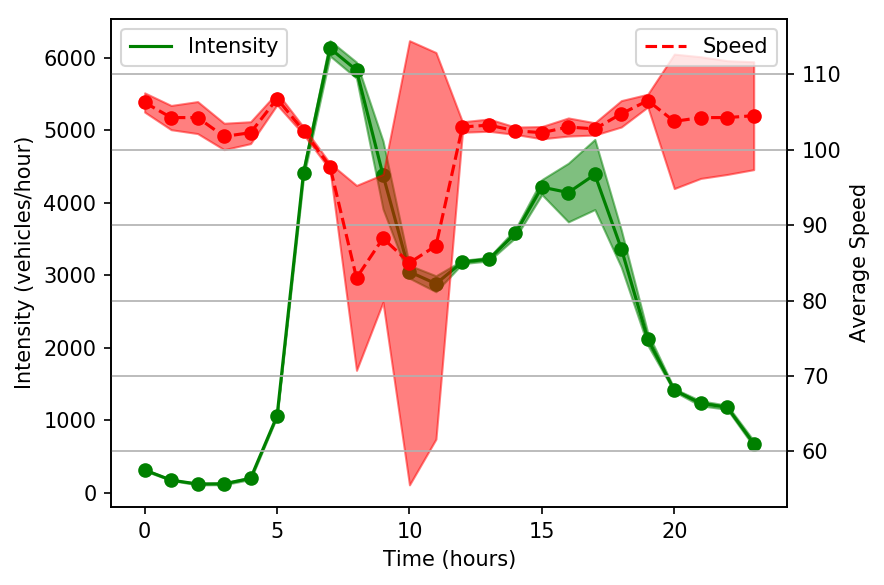

In [28]:
fig, ax1 = plt.subplots()

#Plotting the intensity
plot_variable = np.asarray(average["Intensiteit per uur"].tolist())
plot_error = np.asarray(error["Intensiteit per uur"].tolist())
x_axis = range(0,len(plot_variable))


ax1.set_xlabel('Time (hours)')
ax1.set_ylabel("Intensity (vehicles/hour)")
ax1.scatter(x_axis,plot_variable,c='g')
ax1.plot(x_axis,plot_variable,c='g')
ax1.tick_params(axis='y')
ax1.legend(("Intensity",), loc = 2)
ax1.fill_between(x_axis, plot_variable-plot_error
                 , plot_variable+plot_error, color = 'g', alpha = 0.5)

#Plotting the average speed
plot_variable = np.asarray(average["Gemiddelde alle voertuigen"].tolist())
plot_error = np.asarray(error["Gemiddelde alle voertuigen"].tolist())
x_axis = range(0,len(plot_variable))

ax2 = ax1.twinx()  


ax2.set_ylabel('Average Speed (km/h)') 
ax2.scatter(x_axis,plot_variable,c='r')
ax2.plot(x_axis,plot_variable,c='r', linestyle = '--')
ax2.tick_params(axis='y')
ax2.legend(("Speed",))
ax2.fill_between(x_axis, plot_variable-plot_error
                 , plot_variable+plot_error, color = 'r', alpha = 0.5)
plt.grid(True)
fig.tight_layout()  

plt.show()

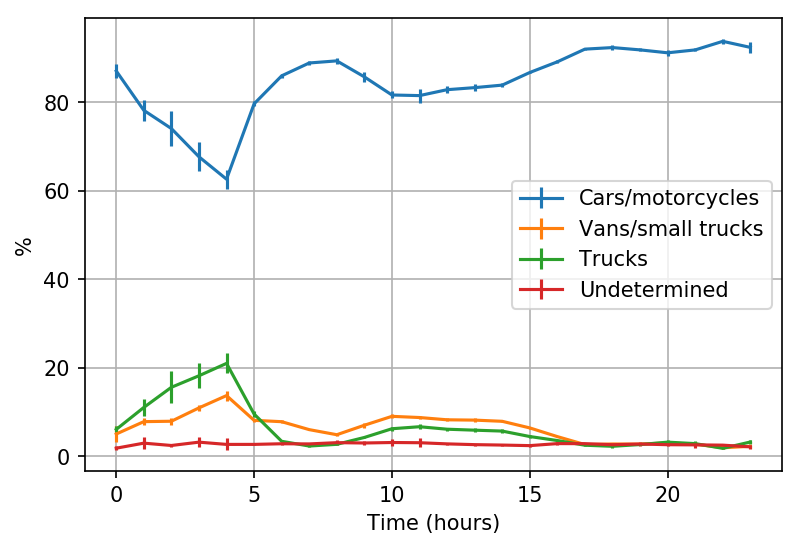

In [29]:
#Plotting the vehicle distribution
cars = np.asarray(average['Motor/personenauto (%)'].tolist())
cars_error = np.asarray(error['Motor/personenauto (%)'].tolist())
vans = np.asarray(average['Licht vrachtverkeer (%)'].tolist())
vans_error = np.asarray(error['Licht vrachtverkeer (%)'].tolist())
trucks = np.asarray(average['Zwaar vrachtverkeer (%)'].tolist())
trucks_error = np.asarray(error['Zwaar vrachtverkeer (%)'].tolist())
undetermined = np.asarray(average['Onbepaald  (%)'].tolist())
undetermined_error = np.asarray(error['Onbepaald  (%)'].tolist())
x_axis = range(0,len(cars))

plot_variable = cars
plot_error = cars_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = vans
plot_error = vans_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = trucks
plot_error = trucks_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = undetermined
plot_error = undetermined_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plt.legend(('Cars/motorcycles','Vans/small trucks','Trucks','Undetermined'))
plt.grid(True)
plt.xlabel('Time (hours)')
plt.ylabel('%')
plt.show()

Maximum speed car/motorcycle: 108.75 km/h
Maximum speed vans/small trucks: 100.75 km/h
Maximum speed trucks: 86.25 km/h


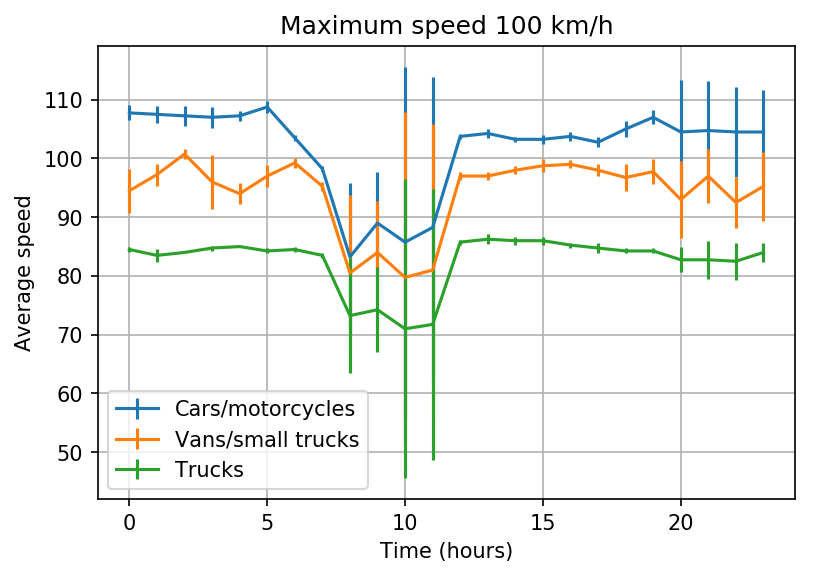

In [30]:
#Plotting the average speed per vehicle
cars = np.asarray(average['Motor/personenauto'].tolist())
cars_error = np.asarray(error['Motor/personenauto'].tolist())
vans = np.asarray(average['Licht vrachtverkeer'].tolist())
vans_error = np.asarray(error['Licht vrachtverkeer'].tolist())
trucks = np.asarray(average['Zwaar vrachtverkeer'].tolist())
trucks_error = np.asarray(error['Zwaar vrachtverkeer'].tolist())
x_axis = range(0,len(cars))

plot_variable = cars
plot_error = cars_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = vans
plot_error = vans_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = trucks
plot_error = trucks_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)



plt.legend(('Cars/motorcycles','Vans/small trucks','Trucks'))
plt.grid(True)
plt.xlabel('Time (hours)')
plt.ylabel('Average speed')
print("Maximum speed car/motorcycle: " + str(max(cars)) + ' km/h')
print("Maximum speed vans/small trucks: " + str(max(vans))+ ' km/h')
print("Maximum speed trucks: " + str(max(trucks))+ ' km/h')
plt.title('Maximum speed 100 km/h')
plt.show()
